#tensorflow 와 세션

In [6]:
import tensorflow as tf
def showvalue(t):
    sess=tf.InteractiveSession() #대화형 세션
    tf.global_variables_initializer().run() # 변수를 초기화한다
    print(t.eval()) #변수를 평가해 ndarray로 값을 돌려줌
    sess.close()
    
#Tensorflow의 3요소 : Constant(상수), Variebles(가중치를 저장한다), Placeholder (주입변수 : 실행시간에 전달되는 데이터를 feeding)

c2,c3 = tf.constant([1.2,5.6]),tf.constant([-4,-1,7]) 
v2,v3 = tf.Variable([2.3,4.5]),tf.Variable([-2,3,5])
#벡터 연산 : 요소 연산 (+,-,*,/), 내적연산 (내적 사이각)
#행렬 연산 : 행렬요소연산, 행렬곱연산 (내적의 연속) -> 차원감소, 특성추출 등
showvalue(tf.add_n([c2,v2])) # add : 2 개의 데이터 합
showvalue(tf.add_n([c3,v3,v3]))
showvalue(tf.sqrt(tf.cast(v3,tf.float64))) #cast : 형변환 함수. 상수를 실수형으로 변환

[ 3.5 10.1]
[-8  5 17]
[       nan 1.73205081 2.23606798]


* 결과값의 이유

3.5 = 1.2 + 2.3, 10.1 = 5.6 + 4.5
-8 = -4 + -2 + -2, 5 = -1 + 3 + 3, 17 = 7 + 5 + 5
nan  = root -2, 1.73205081 = root 3, 2.23606798 = root 5

In [7]:
# matmul = matrix multiply (행렬곱)
c4 = tf.constant([[1,3,5],[0,2,4]])
showvalue(c4) #3, 3, 4, 2, 3 ... 행렬 형식이 길어도 맨 마지막에 있는 숫자가 열데이터 변수의 숫자를 의미 (3개)
v4 = tf.Variable([[1,2],[3,7],[8,9]]) #얘는 3x2 행렬
showvalue(v4)
showvalue(tf.matmul(c4,v4)) # 2x3 * 3X2 = 2x2 -> 차원축소 (특성추출)
showvalue(tf.matmul(v4,c4)) # 3x2 * 2x3 = 3x3 -> 차원확대 (다차원공간)

[[1 3 5]
 [0 2 4]]
[[1 2]
 [3 7]
 [8 9]]
[[50 68]
 [38 50]]
[[ 1  7 13]
 [ 3 23 43]
 [ 8 42 76]]


In [8]:
a = tf.eye(4) #단위행렬 = 행렬의 항등원. 행렬에는 나눗셈이 없으며 역행렬을 곱해서 사용 (행렬 x 역행렬 = 단위행렬)
r = tf.range(1,5,1)#1부터 5까지 1씩 증가하는 list
d = tf.diag(r) #대각행렬
showvalue(a)
showvalue(r)
showvalue(d)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[1 2 3 4]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [10]:
#행렬을 초기화하는 함수
#세션함수
#할당함수

a = tf.Variable(tf.ones((2,2))) #ones : 1로 채워진 행렬, zeros : 0으로 채워진 행렬
a

sess = tf.Session()
sess.run(tf.global_variables_initializer()) #변수초기화
print(a.eval(session=sess))
sess.run(a.assign(tf.zeros((2,2)))) #변수에 값을 할당할 때 assign 함수 사용.
sess.run(a)

[[1. 1.]
 [1. 1.]]


array([[0., 0.],
       [0., 0.]], dtype=float32)

[[0.95227146 0.67740774 0.79531825 0.75578177]
 [0.4759556  0.6310148  0.18602037 0.11430776]
 [0.3362218  0.723335   0.21919966 0.8573376 ]
 [0.82392037 0.59541273 0.00296271 0.24725473]
 [0.5060741  0.36158872 0.04483843 0.97216606]
 [0.82838845 0.41458404 0.601666   0.33958685]]


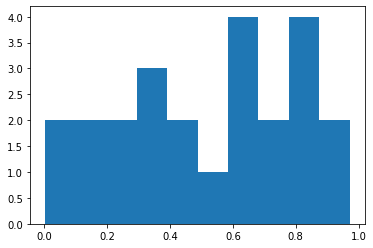

In [18]:
#matplotlib inline <- 주피터노트북에서 써야 이미지가 나옴
import tensorflow as tf

def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

my_distribution = tf.random_uniform((6,4),seed=42) 
# random_uniform은 6x4개의 균등분포를 생성 (현재는 차이가 있어 보이지만, 600x4로 생성하면 거의 평평해짐)
# seed는 컴퓨터에서 정해놓은 의사난수. 같은 결과값을 보기 위해 seed 값을 부여
uniform=run_variable(my_distribution) # mdarray(numpy)로 출력.
#cf) 그냥  my_distribution을 print 찍으면 안 나옴. session을 돌려서 실행해야 함.
print(uniform)
from matplotlib import pyplot as plt
# 연속형 데이터를 구간별로 나누어 그래프화 해줌
plt.hist(uniform.flatten()) # flatten은 배열을 1차원으로 만들어줌. (cnn에서 사용)
plt.show()

In [19]:
a = tf.constant([1,2,3,4,5,6],shape=[2,3])
b = tf.constant([7,8,9,10,11,12],shape=[3,2])
c = tf.matmul(a,b)#행렬곱
sess=tf.Session()
print(sess.run(a))
print(sess.run(b))
print(sess.run(c))

[[1 2 3]
 [4 5 6]]
[[ 7  8]
 [ 9 10]
 [11 12]]
[[ 58  64]
 [139 154]]


In [20]:
x = tf.constant([1,2,3,4,5,6],shape=[2,3])
x = tf.transpose(x)#전치행렬함수
print(sess.run(x))

[[1 4]
 [2 5]
 [3 6]]


In [21]:
c = tf.matmul(x, x) #Error 발생한다. 3x2 행렬과 3x2 행렬은 행렬곱연산이 불가능하기때문

ValueError: Dimensions must be equal, but are 2 and 3 for 'MatMul_3' (op: 'MatMul') with input shapes: [3,2], [3,2].

In [23]:
c = tf.matmul(x, tf.transpose(x))
print(sess.run(c)) # 3x2 행렬과 2x3행렬의 행렬곱연산. 행렬 자기자신을 제곱하려면, 자신의 전치행렬과 행렬곱을 해야 함

[[17 22 27]
 [22 29 36]
 [27 36 45]]


In [25]:
import numpy as np
a = tf.constant(np.arange(1,25,dtype=np.int32), shape=[2,2,2,3]) #열이 3개인 데이터가 2개씩 2개씩 2개
b = tf.constant(np.arange(1,25,dtype=np.int32), shape=[2,2,3,2]) #열이 2개인 데이터가 3개씩 2개씩 2개
c = tf.matmul(a,b) #행렬곱하면 2,2,2,2 shape행렬이 됨
print(sess.run(c))

a_1 = tf.range(1,25,1,dtype=tf.float32); a = tf.reshape(b,(2,2,2,3))
b_1 = tf.range(1,25,1,dtype=tf.float32); b = tf.reshape(b,(2,2,3,2))
c = tf.matmul(a,b)
sess.run(c)

[[[[  22   28]
   [  49   64]]

  [[ 220  244]
   [ 301  334]]]


 [[[ 634  676]
   [ 769  820]]

  [[1264 1324]
   [1453 1522]]]]


array([[[[  22,   28],
         [  49,   64]],

        [[ 220,  244],
         [ 301,  334]]],


       [[[ 634,  676],
         [ 769,  820]],

        [[1264, 1324],
         [1453, 1522]]]])

In [31]:
x = tf.constant([[[1, 2, 3],
                  [4, 5, 6]],
                 [[7, 8, 9],
                  [10, 11, 12]]])
print(sess.run(tf.shape(x))) #shape함수로 행렬의 형태 확인
y= tf.transpose(x,perm=[0,2,1]) #perm <- permute의 약자.  0: 면, 1 : 행, 2 : 열 --- 여기서는 행과 열을 바꾸라는 의미
print(sess.run(tf.transpose(x,perm=[0,2,1])))
print(sess.run(tf.matmul(x,y)))

[2 2 3]
[[[ 1  4]
  [ 2  5]
  [ 3  6]]

 [[ 7 10]
  [ 8 11]
  [ 9 12]]]
[[[ 14  32]
  [ 32  77]]

 [[194 266]
  [266 365]]]


In [34]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12]
print(sess.run(tf.reshape(tensor, [2,-1]))) # 2로 나눴을 때 나머지 차수가 -1 자리에 들어옴
t= tf.reshape(tensor, [-1,6])
print(sess.run(tf.reshape(tensor, [2,-1,3]))) # -1 자리는 컴퓨터가 계산해서 결정해줌

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [ ]:
#Placeholder

In [45]:
import tensorflow as tf
import numpy as np
a = tf.placeholder(tf.int32, shape=[2], name="my_input")
#tensorboard, model 저장시 (why? 세션이 변하면 변수 a의 메모리상 주소값을 다시 불러야 하니까)
# 32비트짜리 데이터가 2개 들어올거라는 걸 지정해놓는 것. (메모리가 작은 상황에서 개발하다보니 이렇게 만들어놨음.)
b = tf.reduce_prod(a, name="prod_b") # 데이터를 모두 곱함
c = tf.reduce_sum(a, name="sum_c") # 데이터를 모두 합침
d = tf.add(b,c,name="add_d") # 데이터를 총합

In [46]:
sess = tf.Session()
input_dict = {a:np.array([5,3],dtype=np.int32)} #dictionary, set
sess.run(d, feed_dict=input_dict) #feeding할 때는 키-데이터 형식으로 전달.

23

In [47]:
#broadcasting
#행렬연산은 요소별로 계산하면 된다고 배웠음. 그런데 짝이 안 맞으면?
#프로그램이 알아서 4를 3개로(4,4,4) 전파(broadcasting)시켜서 연산함.
a = tf.constant([1,2,3], name='a')
b = tf.constant(4, name='b')
add_op = a + b
with tf.Session() as session :
    print(session.run(add_op))

[5 6 7]


In [56]:
a = tf.constant([[1,2,3],[4,5,6]], name='a')
b = tf.constant([[10],[11]], name='b')
add_op = a + b
with tf.Session() as session :
    print(session.run(add_op))

[[11 12 13]
 [15 16 17]]


In [65]:
#문제. 호출방법 : add, feed_dict={a:2.b:3}
import tensorflow as tf
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a, b)
mul = tf.multiply(a, b)

sess = tf.Session()
sess.run(add, feed_dict={a:2,b:3})

5

In [72]:
# 임의의 10000개 난수로부터 실제 방정식을 추론하는 프로그램
x = tf.placeholder("float")
y = tf.placeholder("float")
w = tf.Variable([0.0, 0.0], name='w')
y_model = tf.multiply(x, w[0]) + w[1]
error = tf.square(y - y_model)
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    for i in range(10000) :
        x_value = np.random.rand()
        y_value = x_value * 2 + 6
        session.run(train_op, feed_dict={x:x_value, y:y_value})
    w_value = session.run(w)

print("예측을 위한 모델 : {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))

예측을 위한 모델 : 2.000x + 6.000
